In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.simplefilter('ignore')

In [2]:
path = 'dataset/Crop_recommendation.csv'
df = pd.read_csv(path)

print(df.shape)
df.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# doing 60-40 split
TEST_SIZE = 0.4

features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=TEST_SIZE)

In [5]:

analysis = {}


def evaluate_model(model, name, indepth):
    print('-' * 20, name, '-' * 20)
    y_pred = model.predict(Xtest)

    # gives the precision, f1 score and recall for each class
    if indepth:
        print(classification_report(Ytest, y_pred))
    
    # gives the accuracy score
    test_accuracy = accuracy_score(Ytest, y_pred)
    train_accuracy = accuracy_score(Ytrain, model.predict(Xtrain))
    print(f'Test Accuracy: {test_accuracy*100:.3f}%')
    print(f'Train Accuracy: {train_accuracy*100:.3f}%')

    # plots the confusion matrix as a heatmap
    # results are good if the colors are in a diagonal line
    mat = confusion_matrix(Ytest, y_pred)
    sns.heatmap(mat, annot=True, fmt='d', cbar=False, yticklabels=model.classes_, xticklabels=model.classes_)

    # storing data to compare later

    analysis[name] = {
        'name': name,
        'accuracy': test_accuracy,
        'model': model,
    }

-------------------- Decision Tree --------------------
Test Accuracy: 98.409%
Train Accuracy: 100.000%


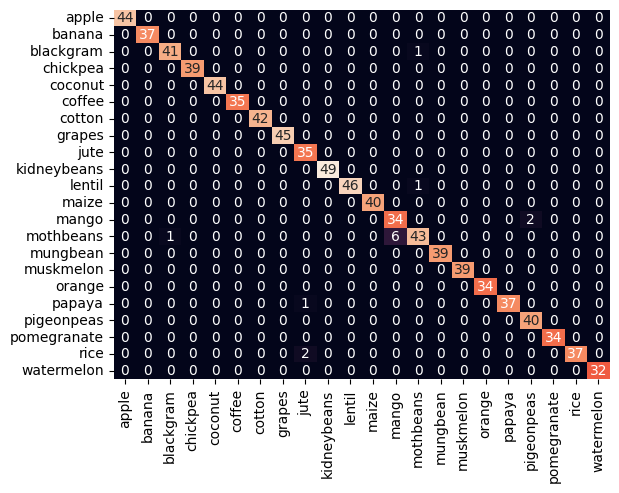

In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Decision Tree', indepth=False)

-------------------- Random Forest --------------------
Test Accuracy: 99.545%
Train Accuracy: 100.000%


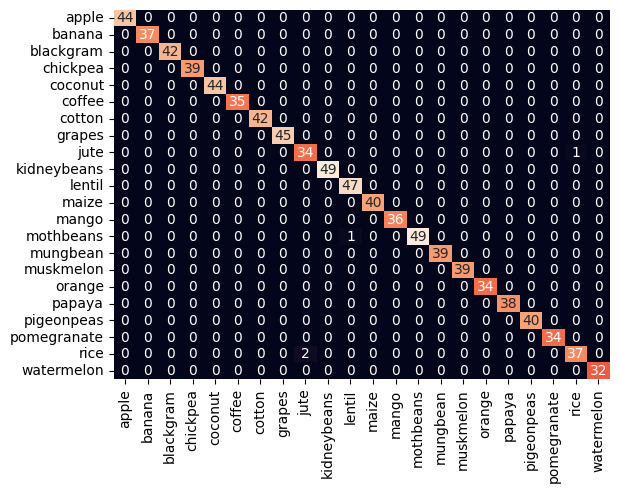

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Random Forest', indepth=False)

-------------------- Naive Bayes --------------------
Test Accuracy: 99.432%
Train Accuracy: 99.545%


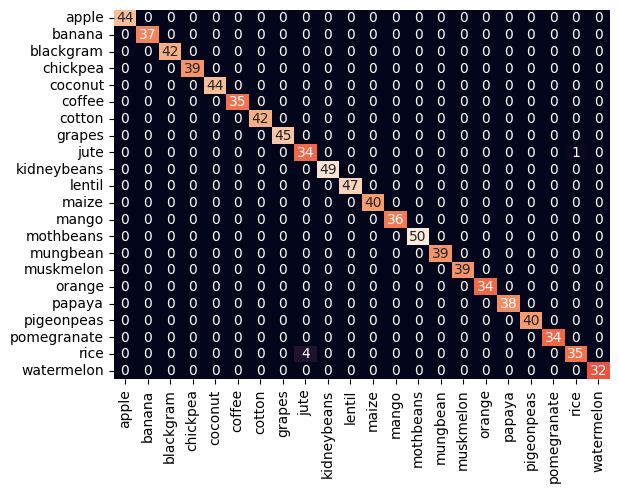

In [8]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Naive Bayes', indepth=False)

-------------------- KNN --------------------
Test Accuracy: 97.500%
Train Accuracy: 98.939%


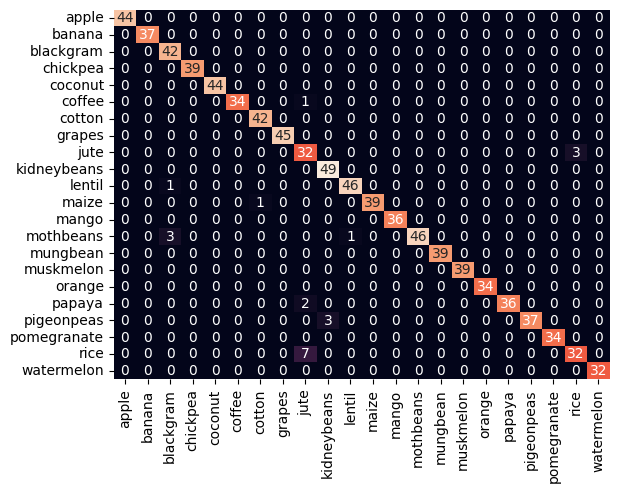

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'KNN', indepth=False)

-------------------- SVM --------------------
Test Accuracy: 97.273%
Train Accuracy: 97.803%


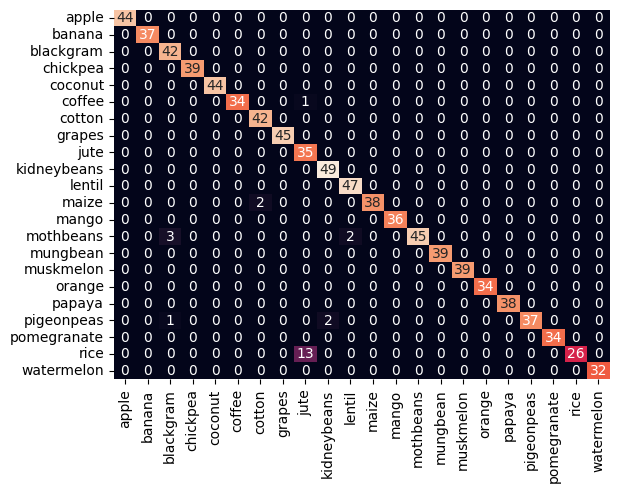

In [10]:
from sklearn.svm import SVC

model = SVC()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'SVM', indepth=False)

-------------------- Logistic Regression --------------------
Test Accuracy: 96.477%
Train Accuracy: 96.970%


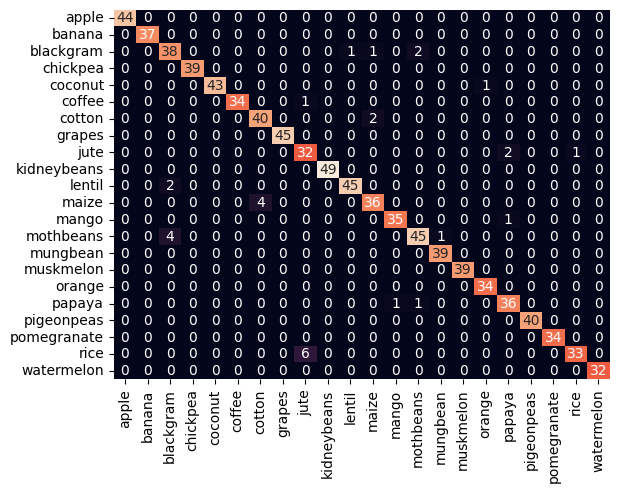

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Logistic Regression', indepth=False)

-------------------- Perceptron --------------------
Test Accuracy: 68.750%
Train Accuracy: 70.455%


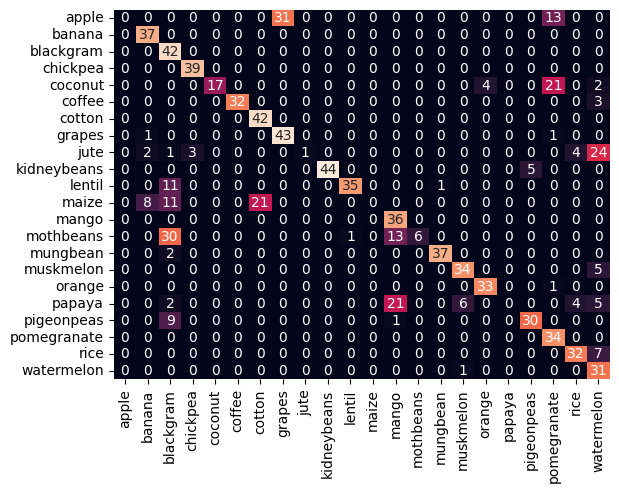

In [12]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Perceptron', indepth=False)

-------------------- MLP --------------------
Test Accuracy: 94.318%
Train Accuracy: 94.848%


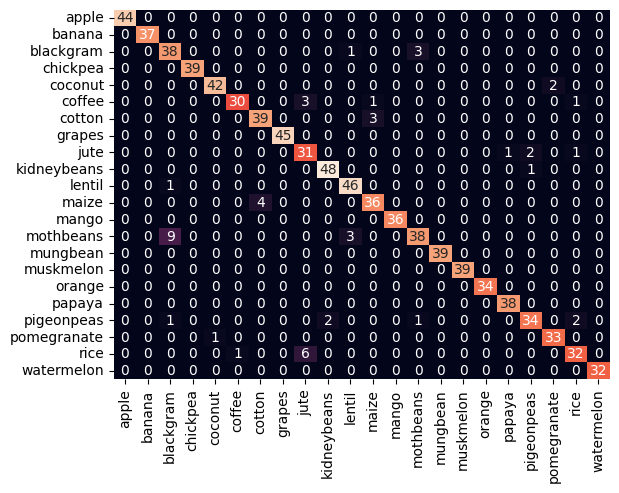

In [13]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(15, 15))
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'MLP', indepth=False)

(0.6, 1.0)

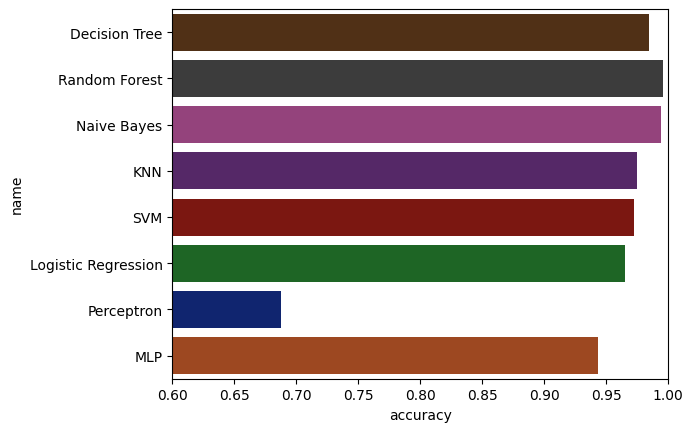

In [14]:
from matplotlib import pyplot as plt

plot_data = {
    'name': [],
    'accuracy': [],
}

for name, data in analysis.items():
    plot_data['name'].append(data['name'])
    plot_data['accuracy'].append(data['accuracy'])


sns.barplot(
    data=plot_data,
    x='accuracy', y='name',
    palette='dark',
    orient='h',
    hue='accuracy',
    dodge=False,
    legend=False,
)
plt.xlim(0.6, 1.0)

------------------ BEST MODEL: 99.55% ------------------
-------------------- Random Forest --------------------
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        44
      banana       1.00      1.00      1.00        37
   blackgram       1.00      1.00      1.00        42
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        44
      coffee       1.00      1.00      1.00        35
      cotton       1.00      1.00      1.00        42
      grapes       1.00      1.00      1.00        45
        jute       0.94      0.97      0.96        35
 kidneybeans       1.00      1.00      1.00        49
      lentil       0.98      1.00      0.99        47
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        36
   mothbeans       1.00      0.98      0.99        50
    mungbean       1.00      1.00      1.00        39
   muskmelon       1.0

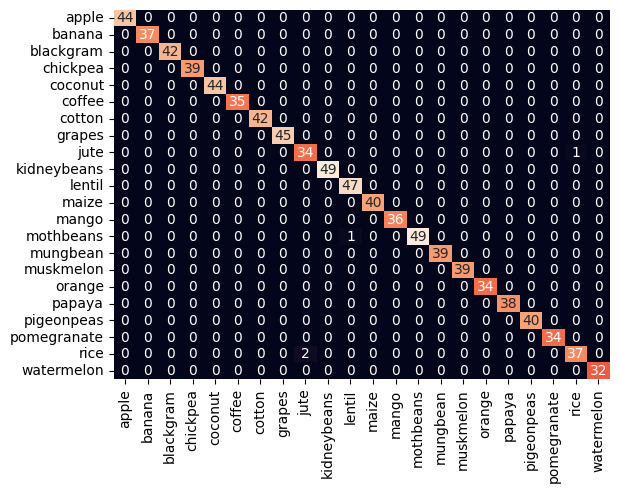

In [15]:
best_model_name = max(analysis, key=lambda x: analysis[x]['accuracy'])
best_model_data = analysis[best_model_name]

print("-"*18, f"BEST MODEL: {best_model_data['accuracy'] * 100:.2f}%", "-"*18)
evaluate_model(best_model_data['model'], best_model_name, indepth=True)

import pickle
pickle.dump(best_model_data['model'], open(f'models/{best_model_name.replace(' ', '-')}--model.pkl', 'wb'))